In [2]:
# 自动计算cell的计算时间
%load_ext autotime

%matplotlib inlinea
%config InlineBackend.figure_format='svg' #矢量图设置，让绘图更清晰

time: 519 ms (started: 2021-08-23 12:37:18 +08:00)


In [ ]:
%%bash

# 增加更新
git add *.ipynb *.md

git remote -v

git commit -m '更新 #2  Aug 23, 2021'

#git push origin master
git push

In [3]:
#设置使用的gpu
import tensorflow as tf
from tensorflow import keras

gpus = tf.config.list_physical_devices("GPU")

if gpus:
   
    gpu0 = gpus[0] #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True) #设置GPU显存用量按需使用
    # 或者也可以设置GPU显存为固定使用量(例如：4G)
    #tf.config.experimental.set_virtual_device_configuration(gpu0,
    #    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) 
    tf.config.set_visible_devices([gpu0],"GPU")

time: 3.65 s (started: 2021-08-23 12:37:22 +08:00)


# 设置

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

time: 805 µs (started: 2021-08-23 12:37:43 +08:00)


# 简介

Keras 函数式 API 是一种创建比 tf.keras.Sequential API 更灵活的模型的方法。 函数式 API 可以处理具有非线性拓扑、共享层甚至多个输入或输出的模型。

主要思想是深度学习模型通常是层的有向无环图（DAG）。 所以函数式 API 是一种构建层图的方法。

考虑以下模型：

In [ ]:
(input: 784-dimensional vectors)
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (10 units, softmax activation)]
       ↧
(output: logits of a probability distribution over 10 classes)

这是一个具有三层的基本图。 要使用函数式 API 构建此模型，请先创建一个输入节点：

In [6]:
inputs = keras.Input(shape=(784,))

time: 15.6 ms (started: 2021-08-23 12:45:59 +08:00)


数据的形状被设置为一个 784 维的向量。 由于只指定了每个样本的形状，因此总是省略批次大小。

例如，如果您有一个形状为 (32, 32, 3) 的图像输入，您将使用：

In [7]:
# Just for demonstration purposes.
img_inputs = keras.Input(shape=(32, 32, 3))

time: 2.42 ms (started: 2021-08-23 12:46:20 +08:00)


返回的输入包含有关您提供给模型的输入数据的形状和数据类型的信息。 这是形状：

In [8]:
inputs.shape

TensorShape([None, 784])

time: 6.07 ms (started: 2021-08-23 12:47:08 +08:00)


这是dtype：

In [9]:
inputs.dtype

tf.float32

time: 2.69 ms (started: 2021-08-23 12:47:37 +08:00)


您可以通过调用此输入对象上的图层在图层图中创建一个新节点：

In [10]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

time: 1.47 s (started: 2021-08-23 12:47:57 +08:00)


“层调用”操作就像从“输入”到您创建的这个层绘制一个箭头。 你将输入“传递”到密集层，你得到 x 作为输出。

让我们在图层图中再添加几个图层：

In [12]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

time: 36.7 ms (started: 2021-08-23 12:48:27 +08:00)


此时，您可以通过在层图中指定其输入和输出来创建模型：

In [13]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

time: 13.3 ms (started: 2021-08-23 12:48:53 +08:00)


让我们看看模型摘要是什么样的：

In [15]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
time: 2.98 ms (started: 2021-08-23 12:49:16 +08:00)


您还可以将模型绘制为图形：

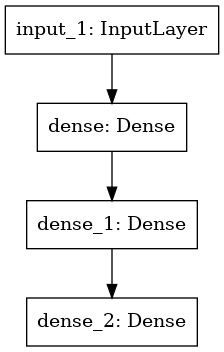

time: 294 ms (started: 2021-08-23 12:49:43 +08:00)


In [17]:
keras.utils.plot_model(model, "my_first_model.png")

并且，可选地，在绘制的图形中显示每一层的输入和输出形状：

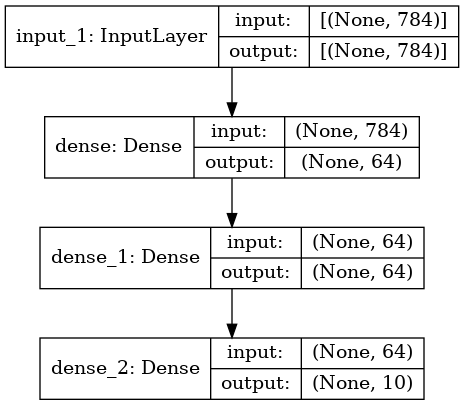

time: 284 ms (started: 2021-08-23 12:50:29 +08:00)


In [19]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

此图和代码几乎相同。 在代码版本中，连接箭头被调用操作取代。

“层图”是深度学习模型的直观心理图像，函数式 API 是一种创建模型的方法，可以密切反映这一点。

# 训练、评估和推理

对于使用函数式 API 构建的模型，训练、评估和推理的工作方式与序列模型完全相同。

Model 类提供了一个内置的训练循环（fit() 方法）和一个内置的评估循环（evaluate() 方法）。 请注意，您可以轻松自定义这些循环以实施监督学习之外的训练程序（例如 GAN）。

在这里，加载 MNIST 图像数据，将其重塑为向量，在数据上拟合模型（同时监控验证拆分的性能），然后在测试数据上评估模型：

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 8s 7ms/step - loss: 0.3441 - accuracy: 0.9006 - val_loss: 0.1762 - val_accuracy: 0.9480
Epoch 2/2
750/750 [==============================] - 5s 7ms/step - loss: 0.1582 - accuracy: 0.9528 - val_loss: 0.1362 - val_accuracy: 0.9592
313/313 - 2s - loss: 0.1366 - accuracy: 0.9573
Test loss: 0.13660204410552979
Test accuracy: 0.9573000073432922
time: 16.2 s (started: 2021-08-23 12:51:37 +08:00)


如需进一步阅读，请参阅培训和评估指南。

# 保存并序列化

对于使用函数式 API 构建的模型，保存模型和序列化的工作方式与它们为序列模型所做的工作方式相同。 保存功能模型的标准方法是调用 model.save() 将整个模型保存为单个文件。 您以后可以从此文件重新创建相同的模型，即使构建模型的代码不再可用。

这个保存的文件包括： - 模型架构 - 模型权重值（在训练期间学习） - 模型训练配置，如果有的话（传递给编译） - 优化器及其状态，如果有的话（从你停止的地方重新开始训练）

In [21]:
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")

INFO:tensorflow:Assets written to: path_to_my_model/assets
time: 771 ms (started: 2021-08-23 12:52:51 +08:00)


有关详细信息，请阅读模型序列化和保存指南。

# 使用相同的层图来定义多个模型

在函数式 API 中，模型是通过在层图中指定其输入和输出来创建的。 这意味着单个层图可用于生成多个模型。

在下面的示例中，您使用相同的层堆栈来实例化两个模型：将图像输入转换为 16 维向量的编码器模型，以及用于训练的端到端自动编码器模型。

In [22]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

这里，解码架构与编码架构严格对称，因此输出形状与输入形状相同 (28, 28, 1)。

Conv2D 层的反面是 Conv2DTranspose 层，MaxPooling2D 层的反面是 UpSampling2D 层。

# 所有模型都是可调用的，就像层一样

通过在输入或另一层的输出上调用它，您可以将任何模型视为一个层。 通过调用模型，您不仅可以重用模型的架构，还可以重用其权重。

为了看到这一点，这里有一个不同的自动编码器示例，它创建一个编码器模型、一个解码器模型，并将它们链接在两个调用中以获得自动编码器模型：

In [24]:
ncoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

如您所见，模型可以嵌套：模型可以包含子模型（因为模型就像一个层）。 模型嵌套的一个常见用例是集成。 例如，以下是如何将一组模型集成到一个模型中，以平均它们的预测：

# 处理复杂的图拓扑

## 具有多个输入和输出的模型

函数式 API 使操作多个输入和输出变得容易。 这无法通过 Sequential API 处理。

例如，如果您正在构建一个系统，用于按优先级对客户问题单进行排序并将它们路由到正确的部门，那么该模型将具有三个输入：
* 票的标题（文本输入），
* 票的文本正文（文本输入），以及
* 用户添加的任何标签（分类输入）

该模型将有两个输出：
* 0 和 1 之间的优先级分数（标量 sigmoid 输出），以及
* 应该处理工单的部门（部门集上的 softmax 输出）。

您可以使用功能 API 在几行中构建此模型：

In [25]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

time: 570 ms (started: 2021-08-23 16:08:21 +08:00)


现在绘制模型：

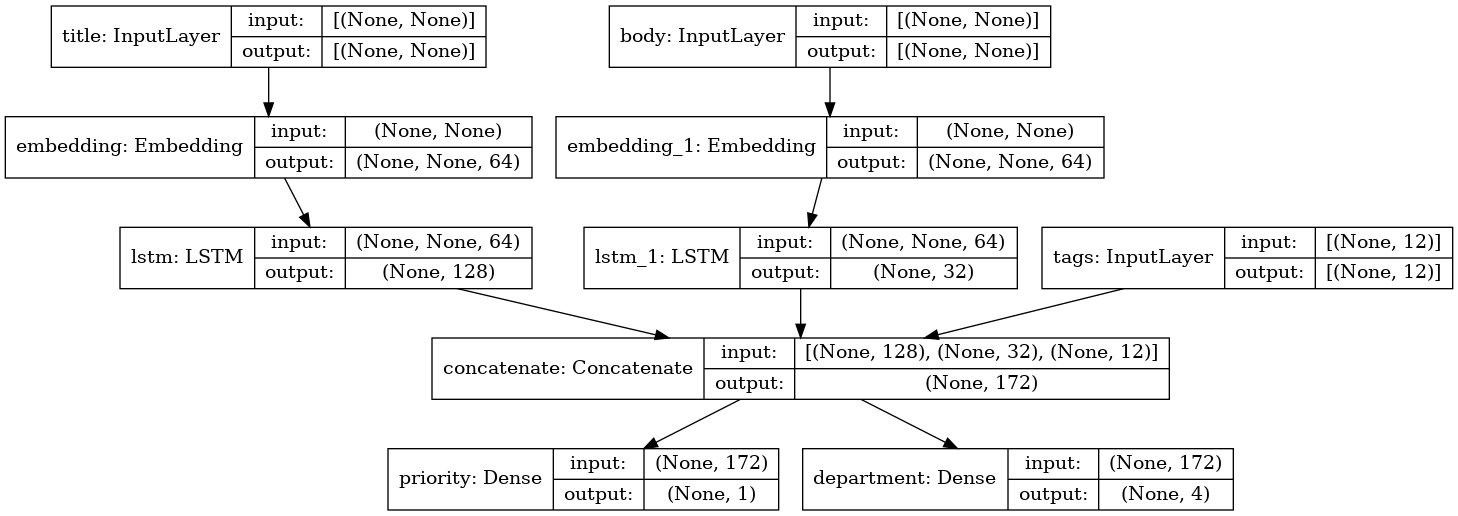

time: 471 ms (started: 2021-08-23 16:08:48 +08:00)


In [26]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [27]:
title_features.shape

TensorShape([None, 128])

time: 3.16 ms (started: 2021-08-23 16:09:45 +08:00)


编译此模型时，您可以为每个输出分配不同的损失。 您甚至可以为每个损失分配不同的权重——以调节它们对总训练损失的贡献。

In [28]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[1.0, 0.2],
)

time: 18 ms (started: 2021-08-23 16:12:55 +08:00)


由于输出层具有不同的名称，您还可以使用相应的层名称指定损失和损失权重：

In [29]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)

time: 12.7 ms (started: 2021-08-23 16:13:26 +08:00)


通过传递输入和目标的 NumPy 数组列表来训练模型：

In [30]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 5s 18ms/step - loss: 1.2861 - priority_loss: 0.6988 - department_loss: 2.9366
Epoch 2/2
40/40 [==============================] - 1s 17ms/step - loss: 1.2739 - priority_loss: 0.6970 - department_loss: 2.8848


time: 5.79 s (started: 2021-08-23 16:14:01 +08:00)


当使用 Dataset 对象调用 fit 时，它应该生成一个列表元组，如 ([title_data, body_data, tags_data], [priority_targets, dept_targets]) 或字典元组 ({'title': title_data, 'body': body_data, 'tags': tags_data}, {'priority': priority_targets, 'department': dept_targets})。

更详细的解释请参考训练和评估指南。

## 一个玩具 ResNet 模型

除了具有多个输入和输出的模型外，函数式 API 还可以轻松操纵非线性连接拓扑——这些模型的层不是按顺序连接的，Sequential API 无法处理。

一个常见的用例是残差连接。 让我们为 CIFAR10 构建一个玩具 ResNet 模型来演示这一点：

In [31]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 28, 28, 64)   18496       conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_9[0][0]                   
_________________________________________________________________________________________

绘制模型：

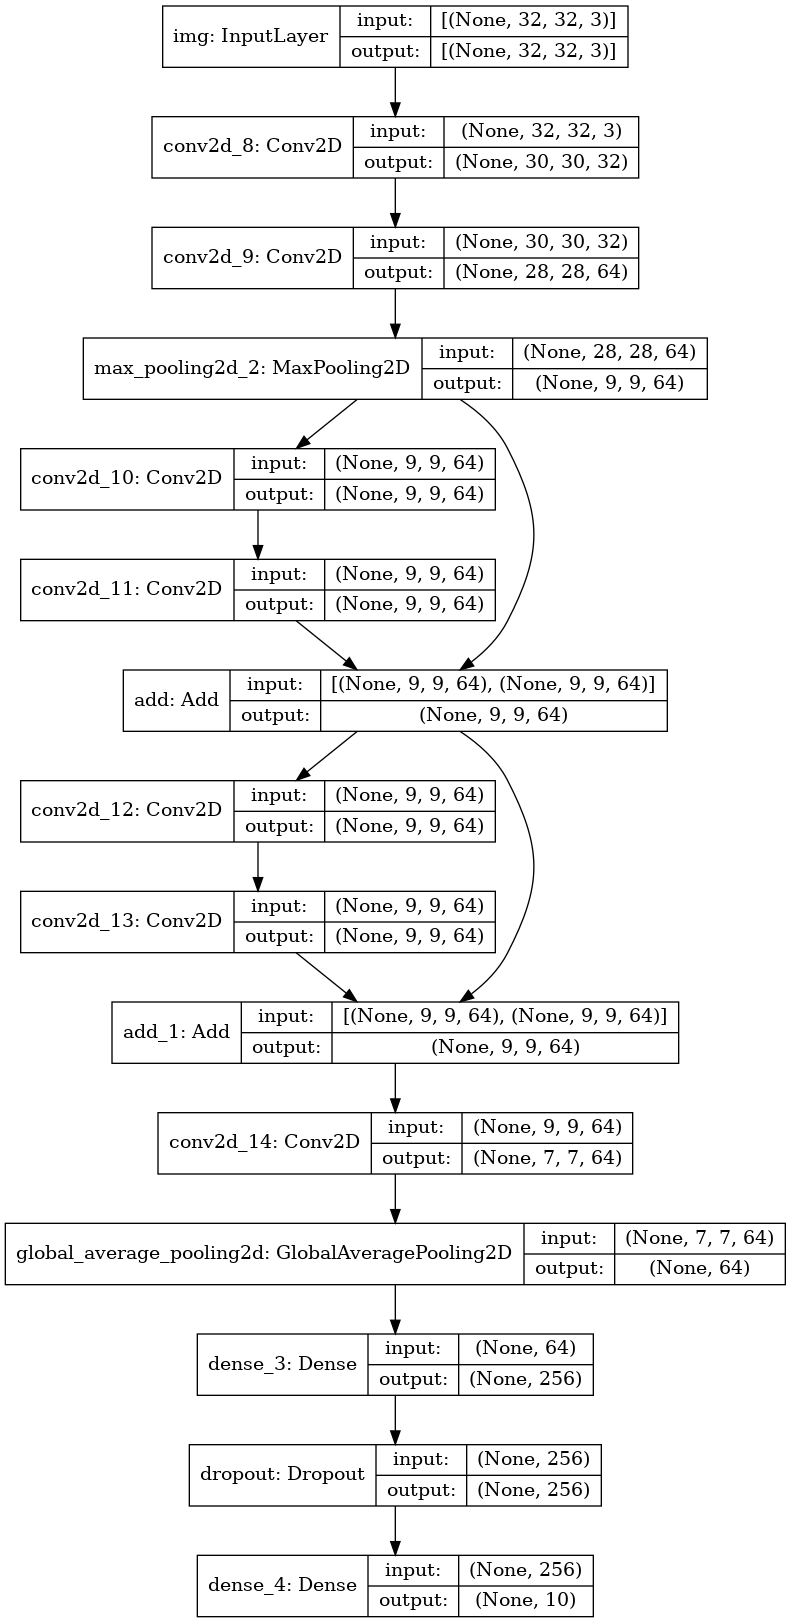

time: 503 ms (started: 2021-08-23 16:16:04 +08:00)


In [32]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

现在训练模型：

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

13/13 [==============================] - 9s 233ms/step - loss: 2.3178 - acc: 0.1037 - val_loss: 2.3000 - val_acc: 0.1250


time: 19.5 s (started: 2021-08-23 16:16:58 +08:00)


# 共享层

函数式 API 的另一个很好的用途是使用共享层的模型。 共享层是在同一模型中多次重复使用的层实例——它们学习与层图中的多个路径对应的特征。

共享层通常用于对来自相似空间的输入进行编码（例如，具有相似词汇量的两段不同文本）。 它们可以在这些不同的输入之间共享信息，并且可以在较少的数据上训练这样的模型。 如果在其中一个输入中看到给定的单词，这将有利于处理通过共享层的所有输入。

要在函数式 API 中共享一个层，请多次调用同一个层实例。 例如，这是在两个不同的文本输入之间共享的嵌入层：

In [34]:
# Embedding for 1000 unique words mapped to 128-dimensional vectors
shared_embedding = layers.Embedding(1000, 128)

# Variable-length sequence of integers
text_input_a = keras.Input(shape=(None,), dtype="int32")

# Variable-length sequence of integers
text_input_b = keras.Input(shape=(None,), dtype="int32")

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

time: 22.7 ms (started: 2021-08-23 16:18:37 +08:00)


# 提取和重用层图中的节点

由于您正在操作的图层图是静态数据结构，因此可以访问和检查它。 这就是您能够将功能模型绘制为图像的方式。

这也意味着您可以访问中间层（图中的“节点”）的激活并在其他地方重用它们——这对于诸如特征提取之类的事情非常有用。

让我们看一个例子。 这是一个在 ImageNet 上预训练权重的 VGG19 模型：

In [35]:
vgg19 = tf.keras.applications.VGG19()

574717952/574710816 [==============================] - 1149s 2us/step
time: 19min 25s (started: 2021-08-23 16:19:56 +08:00)


这些是模型的中间激活，通过查询图数据结构获得：

In [36]:
features_list = [layer.output for layer in vgg19.layers]

time: 578 µs (started: 2021-08-23 16:39:22 +08:00)


使用这些特征来创建一个新的特征提取模型，该模型返回中间层激活的值：

In [37]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

img = np.random.random((1, 224, 224, 3)).astype("float32")
extracted_features = feat_extraction_model(img)

time: 1.83 s (started: 2021-08-23 16:39:56 +08:00)


In [42]:
features_list

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_5')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv4')>,

time: 4.45 ms (started: 2021-08-23 16:42:25 +08:00)


这对于神经风格迁移等任务非常有用。

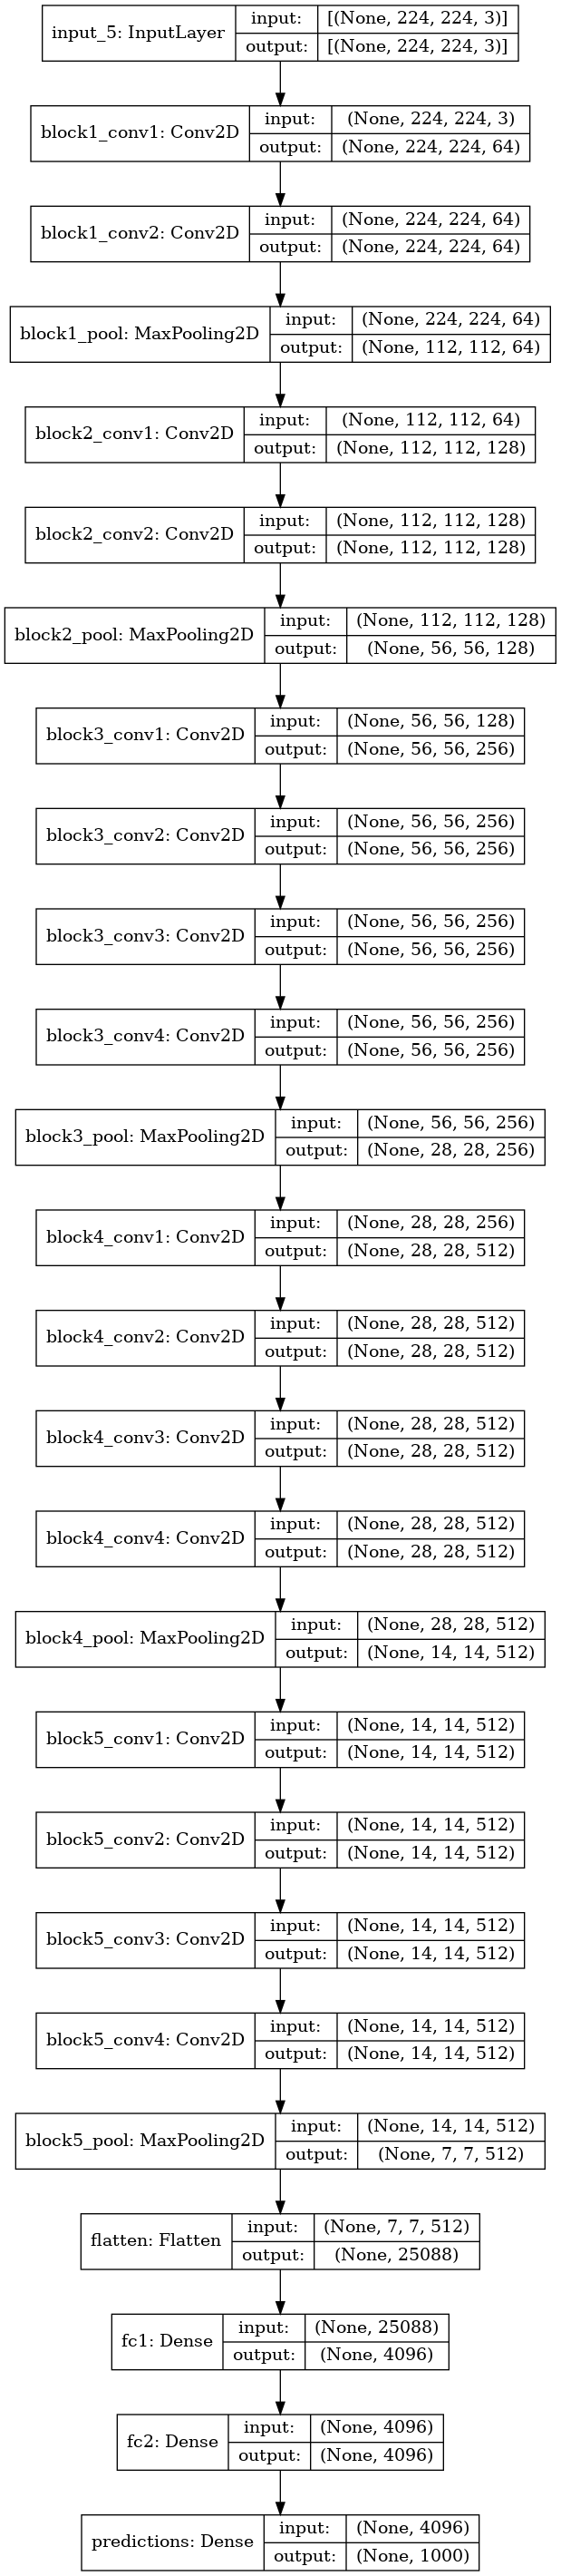

time: 559 ms (started: 2021-08-23 16:41:37 +08:00)


In [40]:
keras.utils.plot_model(feat_extraction_model, show_shapes=True)

# 使用自定义层扩展API

tf.keras 包括广泛的内置层，例如：
* 卷积层：Conv1D、Conv2D、Conv3D、Conv2DTranspose
* 池化层：MaxPooling1D、MaxPooling2D、MaxPooling3D、AveragePooling1D
* RNN 层：GRU、LSTM、ConvLSTM2D
* BatchNormalization、Dropout、Embedding 等。

但是，如果您没有找到您需要的东西，可以通过创建您自己的层来轻松扩展 API。 所有层都是层类的子类并实现：
* call 方法，指定层完成的计算。
* build 方法，它创建层的权重（这只是一个样式约定，因为您也可以在 __init__ 中创建权重）。

要了解有关从头开始创建图层的更多信息，请阅读自定义图层和模型指南。

以下是 tf.keras.layers.Dense 的基本实现：

In [43]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), 
            initializer="random_normal", 
            trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)

time: 74.7 ms (started: 2021-08-23 16:46:18 +08:00)


对于自定义层中的序列化支持，定义一个 get_config 方法，该方法返回层实例的构造函数参数：

In [44]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

    def get_config(self):
        return {"units": self.units}


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)
config = model.get_config()

new_model = keras.Model.from_config(config, custom_objects={"CustomDense": CustomDense})

time: 38.8 ms (started: 2021-08-23 16:49:18 +08:00)


或者，实现类方法 from_config(cls, config) ，在给定其配置字典重新创建层实例时使用该方法。 from_config 的默认实现是：

In [45]:
def from_config(cls, config):
    return cls(**config)

time: 689 µs (started: 2021-08-23 16:50:13 +08:00)


# 何时使用函数式 API

您应该使用 Keras 函数式 API 来创建新模型，还是直接继承 Model 类？ 一般来说，函数式 API 更高级、更简单、更安全，并且具有许多子类模型不支持的功能。

然而，在构建不易表达为层的有向无环图的模型时，模型子类化提供了更大的灵活性。 例如，您无法使用函数式 API 实现 Tree-RNN，而必须直接对 Model 进行子类化。

要深入了解函数式 API 和模型子类化之间的差异，请阅读什么是 TensorFlow 2.0 中的符号 API 和命令式 API？。

## 函数式 API 优势：

以下属性也适用于顺序模型（也是数据结构），但不适用于子类模型（Python 字节码，而不是数据结构）。

### 不那么冗长

没有 super(MyClass, self).__init__(...)，没有 def call(self, ...): 等。

比较：

In [46]:
inputs = keras.Input(shape=(32,))
x = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10)(x)
mlp = keras.Model(inputs, outputs)

time: 41.8 ms (started: 2021-08-23 16:52:50 +08:00)


使用子类版本：

In [47]:
class MLP(keras.Model):

    def __init__(self, **kwargs):
        super(MLP, self).__init__(**kwargs)
        self.dense_1 = layers.Dense(64, activation='relu')
        self.dense_2 = layers.Dense(10)

    def call(self, inputs):
        x = self.dense_1(inputs)
        return self.dense_2(x)

# Instantiate the model.
mlp = MLP()
# Necessary to create the model's state.
# The model doesn't have a state until it's called at least once.
_ = mlp(tf.zeros((1, 32)))

time: 20.8 ms (started: 2021-08-23 16:53:27 +08:00)


### 定义连接图时进行模型验证

在函数式 API 中，输入规范（shape 和 dtype）是预先创建的（使用 Input）。 每次调用一个层时，该层都会检查传递给它的规范是否与其假设相匹配，如果不匹配，它将引发有用的错误消息。

这保证了您可以使用函数式 API 构建的任何模型都可以运行。 所有调试——除了与收敛相关的调试——都是在模型构建期间静态发生的，而不是在执行时发生。 这类似于编译器中的类型检查。

### 功能模型是可绘制和可检查的

您可以将模型绘制为图形，并且可以轻松访问此图形中的中间节点。 例如，要提取和重用中间层的激活（如前面的示例所示）：

In [48]:
features_list = [layer.output for layer in vgg19.layers]
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

time: 8.02 ms (started: 2021-08-23 16:54:42 +08:00)


### 功能模型可以序列化或克隆

因为函数模型是一种数据结构而不是一段代码，所以它可以安全地序列化并且可以保存为单个文件，这样您就可以重新创建完全相同的模型，而无需访问任何原始代码。 请参阅序列化和保存指南。

要序列化子类模型，实现者需要在模型级别指定 get_config() 和 from_config() 方法。

## 函数API弱点：

### 它不支持动态架构
函数式 API 将模型视为层的 DAG。 这适用于大多数深度学习架构，但不是全部——例如，递归网络或树 RNN 不遵循此假设，无法在功能 API 中实现。

# 混合搭配 API 样式

在功能 API 或模型子类化之间进行选择并不是将您限制为一类模型的二元决策。 tf.keras API 中的所有模型都可以相互交互，无论它们是序列模型、功能模型还是从头开始编写的子类模型。

您始终可以使用功能模型或顺序模型作为子类模型或层的一部分：

In [50]:
units = 32
timesteps = 10
input_dim = 5

# Define a Functional model
inputs = keras.Input((None, units))
x = layers.GlobalAveragePooling1D()(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


class CustomRNN(layers.Layer):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        # Our previously-defined Functional model
        self.classifier = model

    def call(self, inputs):
        outputs = []
        state = tf.zeros(shape=(inputs.shape[0], self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs, axis=1)
        print(features.shape)
        return self.classifier(features)


rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, timesteps, input_dim)))

(1, 10, 32)
time: 67 ms (started: 2021-08-23 16:58:24 +08:00)


您可以在函数式 API 中使用任何子类化层或模型，只要它实现了遵循以下模式之一的调用方法：
* call(self, input, **kwargs) -- 其中输入是张量或张量的嵌套结构（例如张量列表），其中 **kwargs 是非张量参数（非输入）。
* call(self, input, training=None, **kwargs) -- 其中 training 是一个布尔值，指示该层是否应在训练模式和推理模式下运行。
* call(self, input, mask=None, **kwargs) -- 其中 mask 是一个布尔掩码张量（例如对 RNN 有用）。
* call(self, input, training=None, mask=None, **kwargs) -- 当然，你可以同时拥有屏蔽和训练特定的行为。

此外，如果您在自定义层或模型上实现 get_config 方法，您创建的功能模型仍将是可序列化和可克隆的。

这是一个从头开始编写的自定义 RNN 的快速示例，用于功能模型：

In [51]:
units = 32
timesteps = 10
input_dim = 5
batch_size = 16


class CustomRNN(layers.Layer):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        self.classifier = layers.Dense(1)

    def call(self, inputs):
        outputs = []
        state = tf.zeros(shape=(inputs.shape[0], self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs, axis=1)
        return self.classifier(features)

    
# Note that you specify a static batch size for the inputs with the `batch_shape`
# arg, because the inner computation of `CustomRNN` requires a static batch size
# (when you create the `state` zeros tensor).
inputs = keras.Input(batch_shape=(batch_size, timesteps, input_dim))
x = layers.Conv1D(32, 3)(inputs)
outputs = CustomRNN()(x)

model = keras.Model(inputs, outputs)

rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, 10, 5)))

time: 212 ms (started: 2021-08-23 17:01:21 +08:00)


In [52]:
x.shape

TensorShape([16, 8, 32])

time: 2.82 ms (started: 2021-08-23 17:01:26 +08:00)
